# *In Titanic Dataset If we Don`t Remove a alive column We Always Get 100% Accuracy Score That Overfits The Model So Remove The Alive Comlumn*

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, mean_squared_log_error, mean_absolute_percentage_error,precision_score, recall_score, f1_score, roc_auc_score,classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
df = sns.load_dataset('titanic').drop(columns=['alive'])  # drop alive (same as target)

num_cols = ['age', 'fare', 'sibsp', 'parch']
cat_cols = ['sex', 'class', 'embarked', 'who', 'deck', 'embark_town', 'alone', 'adult_male']

X = df.drop('survived', axis=1)
y = df['survived']

# preprocessing
numeric = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric, num_cols),
    ('cat', categorical, cat_cols)
])

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8116591928251121
Precision: 0.7640449438202247
Recall: 0.7640449438202247
F1 Score: 0.7640449438202247
Confusion Matrix:
 [[113  21]
 [ 21  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       134
           1       0.76      0.76      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



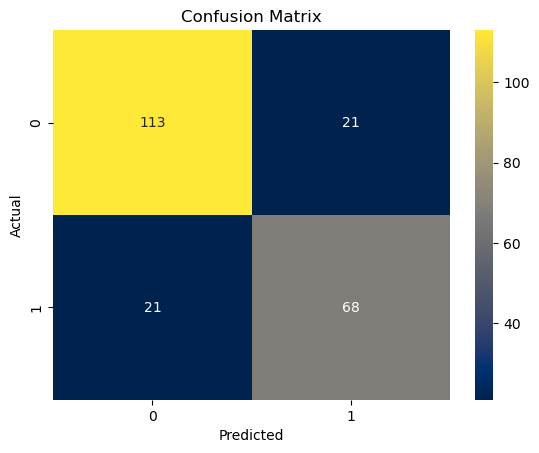

In [104]:
#Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,cmap='cividis', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()